In [1]:
import os, math, import_ipynb, mpld3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.fftpack import fft, fftfreq
from scipy import signal 
from util import *

%matplotlib inline
mpld3.enable_notebook()

importing Jupyter notebook from util.ipynb


---
## 1.0 Global Parameters for Plot Configuration

In [2]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 16,
          'legend.loc': 'best',
          'figure.figsize': (12, 5),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}

# Update plot customisation parameters
pylab.rcParams.update(params)

---
## 2.0 Dataframe Import

In [9]:
working_path = get_folder_path('ftap-forearm')
print(working_path)
os.chdir(working_path)

file = 'ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv'

# file = "working_path/*.csv"
# if "lvl0" in file:
df = read_csv_file(file)

os.chdir('..')


C:\Users\User\Desktop\4th_year_project\Parkinson-Disease-Repository\Testground\Test 3 - Chin Yang Playground\Ken_Test1\Patient001-2019-12-05\ftap-forearm


---
## 3.0 Testground

In [10]:
# fs = 50
# plot_frequency(df, fs, t = file)

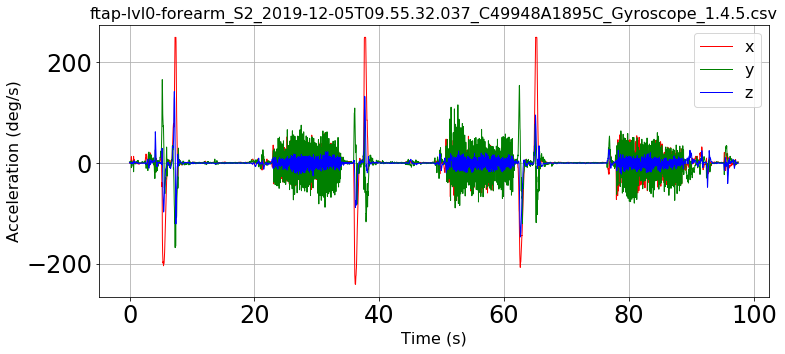

In [11]:
plot_time_3_axes(df, t = file)

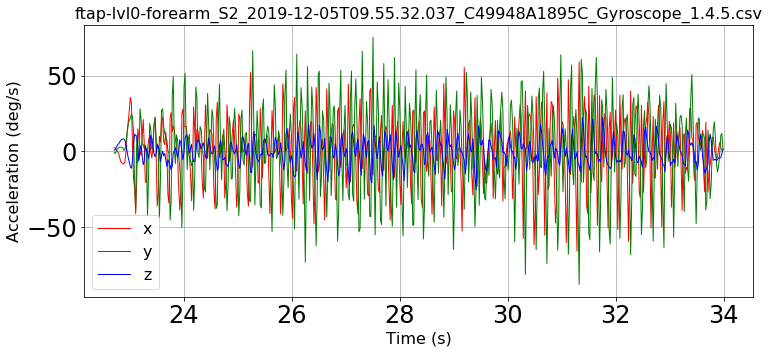

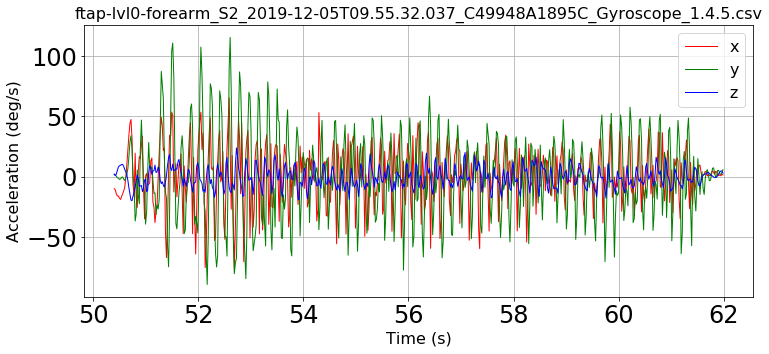

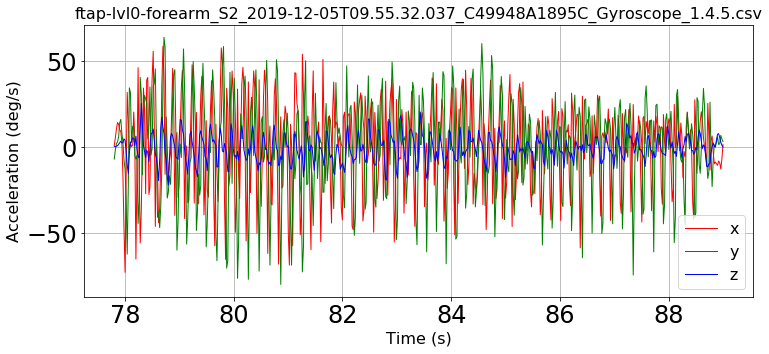

In [18]:
# ==============================================
# Truncated Data Analysis
# ==============================================
# working_path = get_folder_path('prosup-wrist')
# file = 'prosup-lvl0-wrist_S2_2019-12-10T15.13.45.631_C49948A1895C_Accelerometer_1.4.5.csv'
# os.chdir(working_path)

# # Data pre-processing
# df = read_csv_file(os.path.join(working_path,file))
# os.chdir('..')

df_1, df_2, df_3 = truncate_dataframe(working_path, file,22.7,34,50.4,62,77.8,89)

plot_time_3_axes(df_1, t = file)
plot_time_3_axes(df_2, t = file)
plot_time_3_axes(df_3, t = file)
# fs = 50
# plot_frequency(df_1, fs, t = file)
# plot_frequency(df_2, fs, t = file)
# plot_frequency(df_3, fs, t = file)

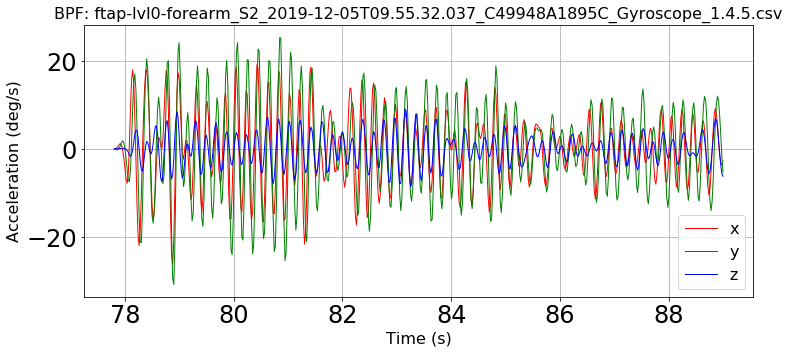

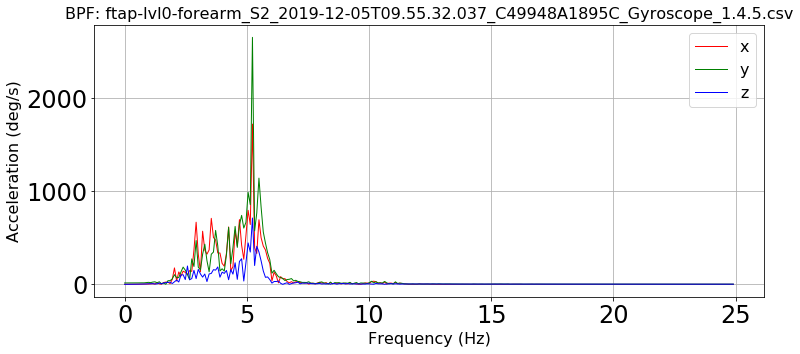

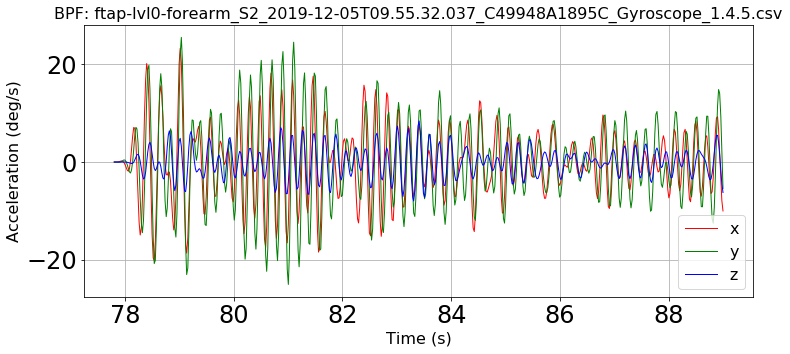

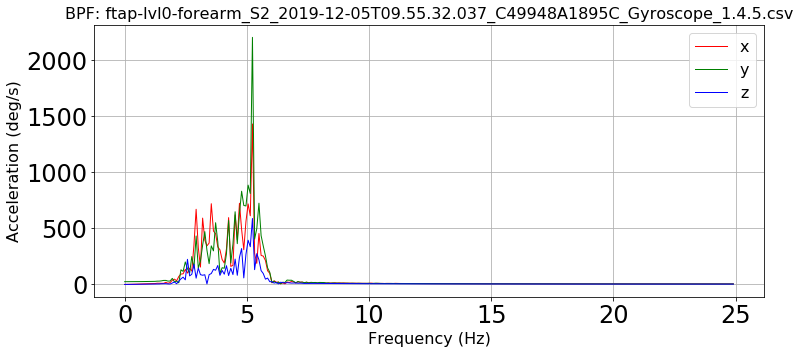

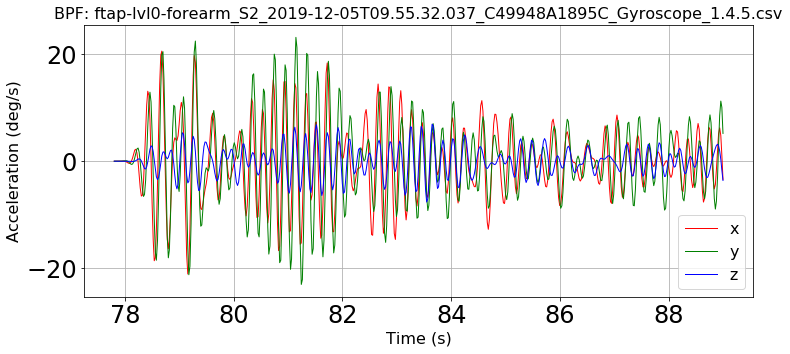

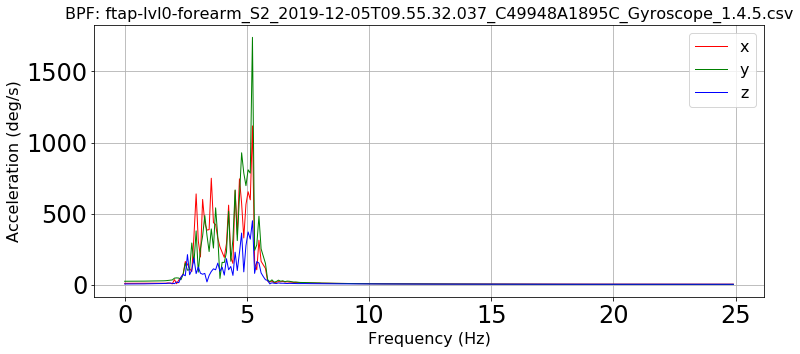

In [29]:
###### fs = 50
lowcut = 2.5
highcut = 5
for order in [3,5,7]:
    

# ==============================================
# Filtered Signals - Data Pre-processing
# ==============================================
    bpf_data = butter_bandpass_filter(df_3, lowcut, highcut, fs, order, file)

# ==============================================
# Filter Plots
# ==============================================
    plot_time_3_axes(bpf_data, t = "BPF: " + file)
    plot_frequency(bpf_data, fs, t = "BPF: " + file)

In [8]:
bpf_data

,epoch (ms),time (-00:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g),filtered x-axis (g),filtered y-axis (g),filtered z-axis (g)
4428,1576669971295,2019-12-18T11:52:51.295,88.005,-0.488,-0.211,0.802,-3.924670e-07,-1.696937e-07,6.449970e-07
4429,1576669971315,2019-12-18T11:52:51.315,88.025,-0.491,-0.207,0.804,-3.982784e-06,-1.717804e-06,6.543120e-06
4430,1576669971334,2019-12-18T11:52:51.334,88.044,-0.489,-0.206,0.802,-1.991289e-05,-8.566560e-06,3.270282e-05
4431,1576669971355,2019-12-18T11:52:51.355,88.065,-0.486,-0.210,0.799,-6.617885e-05,-2.840147e-05,1.086538e-04
4432,1576669971374,2019-12-18T11:52:51.374,88.084,-0.485,-0.211,0.803,-1.660343e-04,-7.111102e-05,2.725438e-04
...,...,...,...,...,...,...,...,...,...
5530,1576669993197,2019-12-18T11:53:13.197,109.907,-0.051,0.923,-0.427,-6.271444e-02,-2.171908e-02,3.900197e-02
5531,1576669993218,2019-12-18T11:53:13.218,109.928,-0.041,0.939,-0.442,-5.746839e-02,-2.828800e-02,6.277591e-02
5532,1576669993237,2019-12-18T11:53:13.237,109.947,-0.029,0.952,-0.444,-4.560935e-02,-3.367413e-02,8.156458e-02
5533,1576669993257,2019-12-18T11:53:13.257,109.967,-0.015,0.960,-0.458,-2.808061e-02,-3.722032e-02,9.308889e-02


In [7]:
# # ======================================================================
# # Edit the input variable below to change to the folder path of interest
# # ======================================================================
# working_path = get_folder_path('prosup-forearm')

# # File and directory management
# os.chdir(working_path)
# directory = os.listdir()

# for file in directory:
#     display(file)
#     df = read_csv_file(file)
#     if df is None:
#         continue

#     # ==============================================
#     # Data Pre-processing
#     # ==============================================
# #     df_raw_stats = pd.DataFrame(collect_stats_from_unprocessed_data(df, file, 4))
# #     display(df_raw_stats)
    
# #     df_processed = process_dataframe(df, file, window, max_window) 
# #     df_processed_stats = pd.DataFrame(collect_stats_from_processed_data(df_processed, file, 4))
# #     display(df_processed_stats)
    
#     # ==============================================
#     # Data Visualisation
#     # ==============================================
#     # Update plot customisation parameters
#     pylab.rcParams.update(params)
    
#     # Uncomment sections below to enable plots of interest
#     plot_time_3_axes(df, t = file)
# #     plot_magnitude_frequency(df_processed, t = file)
# #     plot_frequency(df, fs, t = file)

# # os.chdir('..')

---
## 4.0 Archive Code

In [8]:
# # ======================================================================
# # Edit the input variable below to change to the folder path of interest
# # ======================================================================
# working_path = get_folder_path('tota-calf&heel')

# # Data Overview
# display(working_path)
# df_tabulated_stats = tabulate_all_stats(working_path, 4, 3, 30)
# # display(df_tabulated_stats)

# # File and directory management
# os.chdir(working_path)
# directory = os.listdir()

# for file in directory:
#     display(file)
#     df = read_csv_file(file)
#     if df is None:
#         continue

#     # ==============================================
#     # Data Pre-processing
#     # ==============================================
#     df_raw_stats = pd.DataFrame(collect_stats_from_unprocessed_data(df, file, 4))
#     display(df_raw_stats)
    
# #     df_processed = process_dataframe(df, file, window, max_window) 
# #     df_processed_stats = pd.DataFrame(collect_stats_from_processed_data(df_processed, file, 4))
# #     display(df_processed_stats)
    
#     # ==============================================
#     # Data Visualisation
#     # ==============================================
#     # Update plot customisation parameters
#     pylab.rcParams.update(params)
    
#     # Uncomment sections below to enable plots of interest
#     plot_time_3_axes(df, t = file)
# #     plot_magnitude_frequency(df_processed, t = file)
# #     plot_frequency(df, fs, t = file)

# os.chdir('..')